In [ ]:
## This is a series of examples demonstrating the use of the icanswim/cosmosis repo 
## for data science and machine learning projects.
## This repo is intended to be used as the boiler plate for data science and machine learning projects.
## See the icanswim/qchem repo for a demonstration of the use of this (icanswim/cosmosis) repo.

In [1]:
from model import FFNet, tv_model, IdentityModel, GPT
from learning import Learn, Selector, Metrics
from dataset import CDataset, SKDS, TVDS, ExampleDataset
from dataset import ImageDatasetStats, AsTensor, SqueezeN, DType, Pad1d, EmbedLookup, Reshape

from torch.optim import Adam
from torch.nn import MSELoss, CrossEntropyLoss
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import transforms

In [3]:
#example cosmosis dataset (CDataset)
import numpy as np

class ExampleDataset(CDataset):
    #zero is the lookup for the padding index 
    embed_lookup = {'feature_4': {'a': 1,'b': 2,'c': 3,'d': 4, '0': 0},
                    'feature_3': {'z1': 1, 'y1': 2, 'x1': 3, '0': 0},
                    'feature_6': {'e': 1, 'f': 2, 'g': 3, '0': 0}}
    
    def load_data(self, boom='bust'):
        
        datadic = {1: {'feature_1': np.asarray([.04]),
                       'feature_2': np.asarray([[.02,.03],[.04,.05]]),
                       'feature_3': np.asarray(['z1']),
                       'feature_4': np.asarray(['c','c','d']),
                       'feature_5': np.asarray([1.1]),
                       'feature_6': np.asarray(['e','f','g'])},
                   2: {'feature_1': np.asarray([.03]),
                       'feature_2': np.asarray([[.1,.2],[.3,.4]]),
                       'feature_3': np.asarray(['x1','z1','y1']),
                       'feature_4': np.asarray(['d','a','d']),
                       'feature_5': np.asarray([1.2]),
                       'feature_6': np.asarray(['f','f','g'])}}
        
        print(boom)
        return datadic
    
class ExampleTransform():
    def __init__(self, num):
        self.num = num
        
    def __call__(self, arr):
        return np.add(arr, self.num)

lookup_feature_3 = ExampleDataset.embed_lookup['feature_3']
lookup_feature_4 = ExampleDataset.embed_lookup['feature_4']
lookup_feature_6 = ExampleDataset.embed_lookup['feature_6']
ds_param = {'train_param': {'input_dict': {'X': ['feature_1','feature_2'],
                                           'feature_3': ['feature_3'],
                                           'feature_4': ['feature_4'],
                                           'feature_5': ['feature_5']},
                            'transforms': {'feature_1': [ExampleTransform(10), AsTensor()],
                                           'feature_2': [Reshape(-1), AsTensor()],
                                           'feature_3': [Pad1d(5), EmbedLookup(lookup_feature_3), AsTensor()],
                                           'feature_4': [Pad1d(5), EmbedLookup(lookup_feature_4), AsTensor()],
                                           'feature_5': [AsTensor()],
                                           'feature_6': [EmbedLookup(lookup_feature_6), AsTensor()]},
                              'boom': 'bang'}}
    
ed = ExampleDataset(**ds_param['train_param'])
print('ed[1]: ', ed[1])

model_param = {'device': 'cpu',
               'embed_param': {'feature_3': (4,8,0,False),
                               'feature_4': (5,8,0,False),
                               'flatten': True}}
im = IdentityModel(model_param)
print(im)
print('embedding_layer: ', im.embedding_layer)

out = im(ed[1])
print('out: ', out)
print('out.shape: ', out.shape) # X + embed_3 + embed_4 = 5 + (8 x 5) + (8 x 5) = 85

bang
CDataset created...
ed[1]:  {'X': tensor([10.0400,  0.0200,  0.0300,  0.0400,  0.0500], dtype=torch.float64), 'feature_3': tensor([1, 0, 0, 0, 0]), 'feature_4': tensor([3, 3, 4, 0, 0]), 'feature_5': tensor([1.1000], dtype=torch.float64)}
CModel loaded...
IdentityModel(
  (layers): ModuleList(
    (0): Identity()
  )
)
embedding_layer:  {'feature_3': Embedding(4, 8, padding_idx=0), 'feature_4': Embedding(5, 8, padding_idx=0)}
out:  tensor([10.0400,  0.0200,  0.0300,  0.0400,  0.0500,  1.1000, -0.8862, -0.7113,
        -1.3858,  0.6874,  0.7840, -0.9804,  0.9904, -0.6437,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.3882, -0.2406,
        -0.0853,  0.7537,  1.6780,  0.6443, -0.1552, -2.6897,  1.3882, -0.2406,


In [6]:
#Cosmosis blank parameters

lookup_feature = Dataset.embed_lookup[]
ds_param = {'train_param': {'input_dict': {'model_input': {'model_key1': ['dataset_key2']},
                                             'criterion_input': {'criterion__key': ['dataset_key3']},
                                             'embedding_input': {'embedding_key1': ['dataset_key1']}},
                              'transforms': {'dataset_key1': [Pad1d(), EmbedLookup(lookup_feature), AsTensor()],
                                             'dataset_key2': [AsTensor()],
                                             'dataset_key3': [AsTensor()]}}}

model_param = {'embed_param': {'model_key2': [('embedding_key1',voc,vec,padding_idx,trainable,flatten)]}} 
                                       
metrics_param = {'report_interval': 10,
                  'log_plot': True,
                  'min_lr': .005} #break if learning rate falls below                        
             
opt_param = {'lr': 0.01}

crit_param = {}

sample_param = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_param = {'factor': .5, 
                'patience': 2,
                'cooldown': 2}

l = Learn([DS], 
          Model,
          Metrics=Metrics,
          Sampler=Selector, 
          Optimizer=Optimizer, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=LossFunction,
          model_param=model_param, ds_param=ds_param, sample_param=sample_param,
          opt_param=opt_param, sched_param=sched_param, crit_param=crit_param,
          metrics_param=metrics_param, 
          batch_size=12, epochs=1, gpu=True)

{'b': 1}


In [3]:
#example showing transformer inputs, outputs and parameters
lookup_feature_3 = ExampleDataset.embed_lookup['feature_3']
lookup_feature_4 = ExampleDataset.embed_lookup['feature_4']
lookup_feature_6 = ExampleDataset.embed_lookup['feature_6']
ds_param = {'train_param': {'input_dict': {'model_input': {},
                                             'embedding_input': {'embed_3': ['feature_3'],
                                                                 'embed_4': ['feature_4']},
                                             'criterion_input': {}},
                              'transforms': {'feature_3': [Pad1d(12), EmbedLookup(lookup_feature_3), AsTensor()],
                                             'feature_4': [Pad1d(12), EmbedLookup(lookup_feature_4), AsTensor()]},
                              'boom': 'bang'}}
    
ed = ExampleDataset(**ds_param['train_param'])
print('ed[1]: ', ed[1])

model_param = {'device': 'cpu',
                'd_model': 16, # matches embedding dimension
                'nhead': 4, 
                'num_layers': 2,
                'dim_feedforward': 128,
                'embed_param': {'feature_3': [(4,16,0,True)], # matches embedding_input key
                                 'feature_4': [(5,16,0,True)]}} # matches d_model dimension
                                 

gpt = GPT(model_param)
print(gpt)
print('embeddings: ', gpt.embeddings)
out = gpt(ed[1])
print('out: ', out)
print('out.shape: ', out.shape) # (feature_length, embedding_lenth) = (12, 16)

bang
CDataset created...
ed[1]:  {'model_input': {}, 'embedding_input': {'embed_3': tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'embed_4': tensor([3, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0])}, 'criterion_input': {}}
CModel loaded...
GPT(
  (layers): ModuleList(
    (0): TransformerDecoder(
      (layers): ModuleList(
        (0-1): 2 x TransformerDecoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=16, out_features=16, bias=True)
          )
          (multihead_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=16, out_features=16, bias=True)
          )
          (linear1): Linear(in_features=16, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=16, bias=True)
          (norm1): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((16,), eps=1e-05, elementwi

In [ ]:
#example GPT
lookup_feature = Dataset.embed_lookup[]
ds_param = {'train_param': {'input_dict': {'model_input': {'model_key1': ['dataset_key2']},
                                             'criterion_input': {'criterion__key': ['dataset_key3']},
                                             'embedding_input': {'embedding_key1': ['dataset_key1']}},
                              'transforms': {'dataset_key1': [Pad1d(), EmbedLookup(lookup_feature), AsTensor()],
                                             'dataset_key2': [AsTensor()],
                                             'dataset_key3': [AsTensor()]}}}

model_param = {'device': 'cpu',
                'd_model': 16, # matches embedding dimension
                'nhead': 4, 
                'num_layers': 2,
                'dim_feedforward': 128,
                'embed_param': {'X': [('embed_3',4,16,0,True,False)], # matches embedding_input key
                                 'X1': [('embed_4',5,16,0,True,False)]}} # matches d_model dimension
                                       
metrics_param = {'report_interval': 10,
                  'log_plot': True,
                  'min_lr': .005} #break if learning rate falls below                        
             
opt_param = {'lr': 0.01}

crit_param = {}

sample_param = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_param = {'factor': .5, 
                'patience': 2,
                'cooldown': 2}

l = Learn([DS], 
          GPT,
          Metrics=Metrics,
          Sampler=Selector, 
          Optimizer=Optimizer, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=LossFunction,
          model_param=model_param, ds_param=ds_param, sample_param=sample_param,
          opt_param=opt_param, sched_param=sched_param, crit_param=crit_param,
          metrics_param=metrics_param, 
          batch_size=12, epochs=1, gpu=True)

In [4]:
#example cosmosis sklearn regression dataset wrapper (SKDS)
ds_param = {'train_param': {'input_dict': {'model_input': {'X': ['X']},
                                             'criterion_input': {'target': ['y']}},
                              'dataset': 'make_regression',
                              'sk_param': {'n_samples': 100,
                                            'n_features': 5},
                              'features_dtype': 'float32',
                              'targets_dtype': 'float32'}}

sk = SKDS(**ds_param['train_param'])

sk[1]

creating scikit learn make_regression dataset...
CDataset created...


{'model_input': {'X': array([-0.02167437,  1.8568192 , -0.5180579 ,  0.23457602,  0.4004093 ],
        dtype=float32)},
 'criterion_input': {'target': array([38.80209], dtype=float32)}}

In [5]:
#example cosmosis sklearn classification dataset wrapper (SKDS)
ds_param = {'train_param': {'input_dict': {'model_input': {'X': ['X']},
                                             'criterion_input': {'y': ['y']}},
                              'features_dtype': 'float32',
                              'targets_dtype': 'int64',
                              'transforms': {'y': [],
                                             'X': [AsTensor()]},
                              'dataset': 'make_classification',
                              'sk_param': {'n_samples': 1000,
                                            'n_features': 30,
                                            'n_informative': 20,
                                            'n_clusters_per_class': 3,
                                            'flip_y': 0.05,
                                            'class_sep': 0.1,
                                            'n_classes': 4}}}

sk = SKDS(**ds_param['train_param'])

print(sk[1])


creating scikit learn make_classification dataset...
CDataset created...
{'model_input': {'X': tensor([-6.2051e+00,  3.6342e-01, -1.6450e+00, -1.7563e+00,  8.3852e-01,
         1.3925e-01, -1.9553e+00,  2.5190e-01, -3.4702e+00,  4.3878e+00,
         1.3850e+00, -2.3536e+00,  8.8574e-01, -1.0598e+00, -9.6637e-01,
         1.7061e+00,  3.1246e-01, -1.2932e+00, -4.5122e-03,  5.9391e+00,
         4.6922e-01,  1.7090e+00, -1.9296e+00, -1.7275e+00, -3.4237e+00,
         2.7436e+00,  8.1151e-02, -9.2519e-01, -1.6510e+00,  4.9395e+00])}, 'criterion_input': {'y': array([2])}}


In [6]:
#example cosmosis torchvision image dataset wrapper (TVDS)
ds_param={'dataset': 'MNIST',
           'input_dict': {'model_input': {'features': ['images'],},
                          'criterion_input': {'target': ['labels']}},
           'tv_param': {'root': './data/',
                         'train': True,
                         'download': True,
                         'transform': transforms.Compose([transforms.Resize(224)]),
                         'target_transform': None}}

tvds = TVDS(**ds_param)
tvds[1]

creating torch vision MNIST dataset...
CDataset created...


{'model_input': {'image': <PIL.Image.Image image mode=L size=224x224>},
 'criterion_input': {'y': 0}}

In [7]:
#example cosmosis torchvision image dataset wrapper (TVDS) with transforms and PIL stats
ds_param={'dataset': 'MNIST',
           'tv_param': {'root': './data/',
                         'train': True,
                         'download': True,
                         'transform': transforms.Compose([
                                           transforms.Resize(224)]),
                         'target_transform': None}}

tvds = TVDS(**ds_param)
ids = ImageDatasetStats(tvds)

print('mean: ', ids.stats.mean)
print('stddev: ', ids.stats.stddev)

#mean: 33.3/255 = .13
#stddev: 73.7/255 = .29

creating torch vision MNIST dataset...
CDataset created...
images to process: 60000
images processed: 10000
images processed: 20000
images processed: 30000
images processed: 40000
images processed: 50000
images processed: 60000
mean: [33.33091590401786], stddev: [73.70246726596685]
mean:  [33.33091590401786]
stddev:  [73.70246726596685]


creating scikit learn make_regression dataset...
CDataset created...
FFNet model loaded...
CModel loaded...
running model on gpu...

...........................
learning time: 0:00:00.869194
epoch: 0, lr: 0.01
train loss: 570811.8402777778, val loss: 409540.1619318182
last 5 targets: 
[-694.05975  731.8042  -809.2322   242.75883   93.38955]
last 5 predictions: 
[-1.9535663e+02  1.5499834e+02 -2.2164812e+02  7.1352177e+00
  7.5425967e-03]

...........................
learning time: 0:00:04.102554
epoch: 10, lr: 0.01
train loss: 10705.57773618345, val loss: 9842.58065518466
last 5 targets: 
[-579.2699   -97.93261   70.90297 -510.92636 -601.8654 ]
last 5 predictions: 
[-751.4004   -164.53261   -75.491486 -554.6135   -780.8262  ]

...........................
learning time: 0:00:06.949701
epoch: 19, lr: 0.005
train loss: 9550.136537905093, val loss: 8245.953346946022
last 5 targets: 
[ -504.5633  1291.7238 -1264.6017  1078.561   -339.8949]
last 5 predictions: 
[ -397.73767  1152.6466  -1161

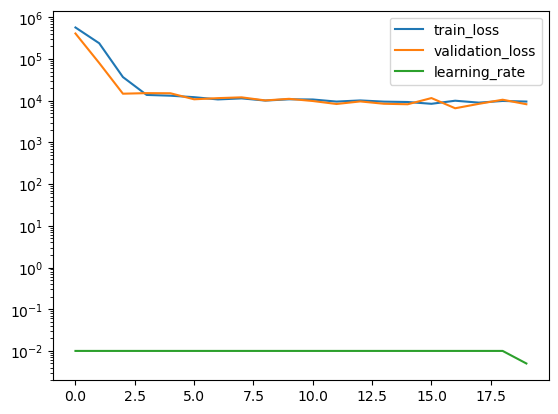

In [7]:
#example cosmosis sklearn regression dataset wrapper (SKDS) with sklearn metrics (Metrics) and 
#custom model (FFNet)
model_param = {'in_channels': 256, 
                'hidden': 512, 
                'out_channels': 1, 
                'model_name': 'funnel'}

ds_param = {'train_param': {'input_dict': {'model_input': {'X': ['X']},
                                             'criterion_input': {'y': ['y']}},
                              'features_dtype': 'float32',
                              'targets_dtype': 'float32',
                              'dataset': 'make_regression',
                              'sk_param': {'n_samples':20000,
                                            'n_features': 256,
                                            'n_informative': 200}}}
             
metrics_param = {'report_interval': 10,
                  'log_plot': True,
                  'min_lr': .005} #break if learning rate falls below                        
             
opt_param = {'lr': 0.01}

crit_param = {'reduction': 'sum'}

sample_param = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_param = {'factor': .5, 
                'patience': 2,
                'cooldown': 2}

l = Learn([SKDS], 
          FFNet,
          Metrics=Metrics,
          Sampler=Selector, 
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=MSELoss,
          model_param=model_param, ds_param=ds_param, sample_param=sample_param,
          opt_param=opt_param, sched_param=sched_param, crit_param=crit_param,
          metrics_param=metrics_param, 
          batch_size=256, epochs=40, gpu=True)

creating scikit learn make_classification dataset...
CDataset created...
FFNet model loaded...
CModel loaded...
running model on gpu...

...........................
learning time: 0:00:05.061245
epoch: 0, lr: 0.01
train loss: 0.01074171671984997, val loss: 0.010543715925170826
last 5 targets: 
[1 2 3 0 2]
last 5 predictions: 
[[0.47453642 0.17502466 0.17537697 0.17506193]
 [0.19534473 0.28776583 0.29472646 0.22216292]
 [0.2929238  0.23093137 0.24418378 0.23196106]
 [0.47242483 0.17554228 0.17659158 0.17544131]
 [0.2583924  0.24633484 0.2525452  0.2427275 ]]
sklearn train metric: 0.5499505385286507, sklearn validation metric: 0.5988706983738608

...........................
learning time: 0:00:38.333101
epoch: 8, lr: 0.01
train loss: 0.009179780234142646, val loss: 0.009378042390458604
last 5 targets: 
[0 0 0 3 2]
last 5 predictions: 
[[0.4753637  0.17487824 0.17487824 0.17487986]
 [0.18800491 0.23819262 0.38793012 0.1858723 ]
 [0.17490724 0.17490393 0.17498797 0.47520083]
 [0.17507595 0

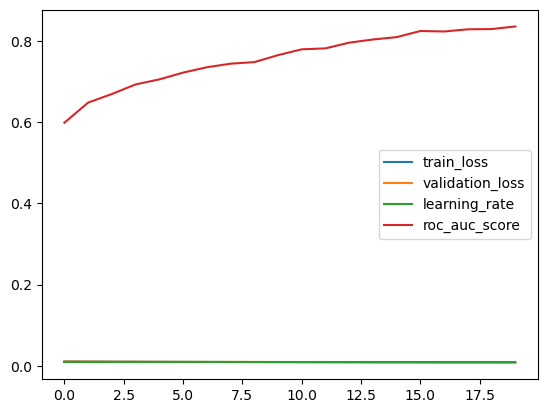

In [8]:
#example cosmosis sklearn classification dataset wrapper (SKDS) with sklearn metrics (Metrics) and 
#custom model (FFNet)
model_param = {'in_channels': 256, 
                'hidden': 128, 
                'out_channels': 4,
                'softmax': 'softmax',
                'model_name': 'funnel'}

ds_param = {'train_param': {'input_dict': {'model_input': {'X': ['X']},
                                             'criterion_input': {'y': ['y']}},
                              'features_dtype': 'float32',
                              'targets_dtype': 'int64',
                              'transforms': {'y': [SqueezeN()],
                                             'X': []},
                              'dataset': 'make_classification',
                              'sk_param': {'n_samples': 100000,
                                            'n_features': 300,
                                            'n_informative': 200,
                                            'n_redundant': 5,
                                            'n_repeated': 5,
                                            'n_clusters_per_class': 5,
                                            'flip_y': 0.05,
                                            'class_sep': 0.05,
                                            'n_classes': 4}}}
                                     
metrics_param = {'report_interval': 30,
                  'log_plot': False,
                  'sk_metric_name': 'roc_auc_score',
                  'sk_param': {'average': 'macro',
                                'multi_class': 'ovr'}}

opt_param = {'lr': 0.01}

crit_param = {}

sample_param = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_param = {'factor': .5,
                'patience': 2,
                'cooldown': 1}

l = Learn([SKDS], 
          FFNet, 
          Sampler=Selector,
          Metrics=Metrics,
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=CrossEntropyLoss,
          model_param=model_param, ds_param=ds_param, 
          sample_param=sample_param, opt_param=opt_param, 
          sched_param=sched_param, crit_param=crit_param,
          metrics_param=metrics_param,
          adapt=(300,256,.2), 
          squeeze_y_pred=False, batch_size=128, epochs=20, 
          save_model='demo_model')

In [9]:
#example inference with cosmosis sklearn classification dataset wrapper (SKDS) and custom model (FFNet)
model_param = {'in_channels': 256, 
                'hidden': 128, 
                'out_channels': 4, 
                'model_name': 'funnel'}

ds_param = {'train_param': {'input_dict': {'model_input': {'X': ['X']},
                                             'criterion_input': {'y': ['y']}},
                              'features_dtype': 'float32',
                              'targets_dtype': 'int64',
                              'dataset': 'make_classification',
                              'sk_param': {'n_samples': 10000,
                                            'n_features': 300,
                                            'n_informative': 200,
                                            'n_clusters_per_class': 3,
                                            'flip_y': 0.05,
                                            'class_sep': 0.1,
                                            'n_classes': 4}}}
                                     

metrics_param = {}
opt_param = {}
sample_param = {}
sched_param = {}

l = Learn([SKDS], 
          FFNet, 
          Sampler=Selector,
          Metrics=Metrics,
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=None,
          model_param=model_param, ds_param=ds_param, 
          sample_param=sample_param, opt_param=opt_param, 
          sched_param=sched_param, crit_param=crit_param,
          metrics_param=metrics_param,
          batch_size=128, epochs=1, load_model='demo_model.pth')

creating scikit learn make_classification dataset...
CDataset created...
FFNet model loaded...
CModel loaded...
model loaded from pickle...
running model on gpu...
inference 2024-07-06 10:04:01.348017 complete and saved to csv...


creating torch vision CIFAR10 dataset...
Files already downloaded and verified
CDataset created...
creating torch vision CIFAR10 dataset...
Files already downloaded and verified
CDataset created...
torchvision model resnet18 loaded...
running model on gpu...

...........................
learning time: 0:00:06.367326
epoch: 0, lr: 0.01
train loss: 2.344989634990692, val loss: 2.069432597006521
last 5 targets: 
[8 9 8 9 9]
last 5 predictions: 
[[0.2123445  0.19273324 0.02236716 0.02205187 0.01213914 0.0197802
  0.01307945 0.0478744  0.3090961  0.14853396]
 [0.10468731 0.1034205  0.06624182 0.08259415 0.05970234 0.07346159
  0.07535665 0.1380432  0.1357257  0.16076678]
 [0.04890709 0.0288717  0.13557598 0.16724059 0.23622043 0.10347922
  0.10636452 0.09043767 0.06116037 0.02174239]
 [0.12924644 0.10628965 0.05628774 0.06899554 0.04681277 0.0581144
  0.05873398 0.13206461 0.16603819 0.1774166 ]
 [0.05642612 0.15789351 0.06924097 0.0986359  0.09127001 0.09493646
  0.11271626 0.1233262  0.07

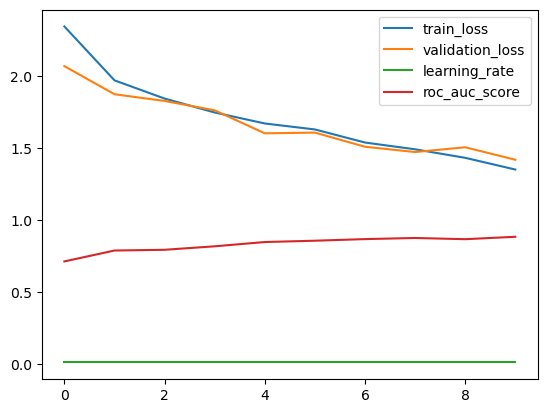

In [10]:
#example cosmosis torchvision image dataset wrapper (TVDS) with transforms and 
#torchvision model wrapper (tv_model)
model_param = {'model_name': 'resnet18',
                'in_channels': 3,
                'tv_param': {'num_classes': 10}}

ds_param={'train_param': {'dataset': 'CIFAR10',
                            'tv_param': {'root': './data/',
                                          'train': True,
                                          'download': True,
                                          'transform': transforms.Compose([
                                                           transforms.RandomRotation(10),
                                                           transforms.Resize(64),
                                                           transforms.ToTensor()]),
                                          'target_transform': None,
                                          'download': True}},
           'test_param': {'dataset': 'CIFAR10',
                           'tv_param': {'root': './data/',
                                         'train': False,
                                         'download': True,
                                         'transform': transforms.Compose([
                                                         transforms.Resize(64),
                                                         transforms.ToTensor()]),
                                         'target_transform': None,
                                         'download': True}}}

metrics_param = {'report_interval': 30, 
                  'sk_metric_name': 'roc_auc_score', 
                  'sk_param': {'average': 'macro',
                                'multi_class': 'ovr'}}

opt_param = {'lr': 0.01}

crit_param = {'reduction': 'sum'}

sample_param = {'set_seed': 88,
                 'splits': (.8,),
                 'subset': .1}

sched_param = {'factor': .5,
                'patience': 1,
                'cooldown': 1}

l = Learn([TVDS,TVDS], 
          tv_model, 
          Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=CrossEntropyLoss, 
          model_param=model_param, ds_param=ds_param, sample_param=sample_param, 
          opt_param=opt_param, sched_param=sched_param, crit_param=crit_param,
          metrics_param=metrics_param, 
          batch_size=16, epochs=10)

creating torch vision CIFAR10 dataset...
CDataset created...
creating torch vision CIFAR10 dataset...
CDataset created...
torchvision model resnext50_32x4d loaded...
running model on gpu...

...........................
learning time: 0:01:07.094914
epoch: 0, lr: 0.01
train loss: 2.585136613845825, val loss: 2.1185145224294355
last 5 targets: 
[8 9 8 9 9]
last 5 predictions: 
[[0.30253568 0.11237798 0.03167152 0.05573671 0.02080508 0.04478636
  0.01746747 0.05677406 0.2294811  0.12836409]
 [0.2315257  0.12143717 0.04448871 0.07289069 0.03243853 0.0637711
  0.0288915  0.07515708 0.20141236 0.1279871 ]
 [0.03839595 0.06840991 0.0972108  0.12640859 0.15202656 0.12026624
  0.16718684 0.1316344  0.0428367  0.05562405]
 [0.2968035  0.11416663 0.03069211 0.05286203 0.01864617 0.04576721
  0.01570734 0.05419432 0.24182352 0.12933718]
 [0.11390245 0.11164503 0.07637165 0.10740997 0.07963003 0.09837136
  0.07986995 0.1099568  0.11613112 0.10671167]]
sklearn train metric: 0.6062727936906026, sklea

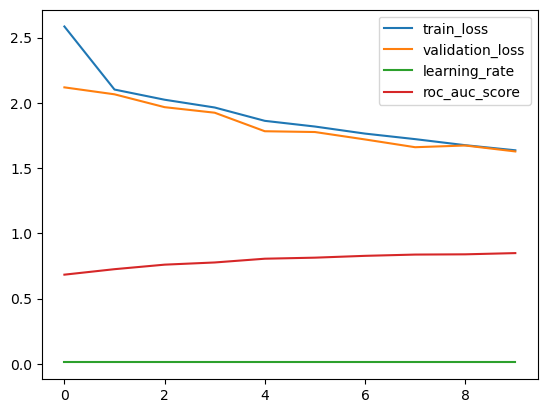

In [12]:
#example cosmosis torchvision dataset wrapper (TVDS) with transforms and 
#torchvision model wrapper (tv_model)
model_param = {'model_name': 'resnext50_32x4d',
                'in_channels': 3,
                'tv_param': {'num_classes': 10}}

ds_param={'train_param': {'dataset': 'CIFAR10',
                            'tv_param': {'root': './data/',
                                          'train': True,
                                          'transform': transforms.Compose([
                                                       transforms.RandomRotation(10),
                                                       transforms.Resize(256),
                                                       transforms.ToTensor()]),
                                          'target_transform': None}},
           'test_param': {'dataset': 'CIFAR10',
                           'tv_param': {'root': './data/',
                                         'train': False,
                                         'transform': transforms.Compose([
                                                      transforms.Resize(256),
                                                      transforms.ToTensor()]),
                                         'target_transform': None}}}

metrics_param = {'report_interval': 60, 
                  'sk_metric_name': 'roc_auc_score', 
                  'sk_param': {'average': 'macro',
                                'multi_class': 'ovr'}}

opt_param = {'lr': 0.01}

crit_param = {'reduction': 'sum'}

sample_param = {'set_seed': 88,
                 'splits': (.8,),
                 'subset': .1}

sched_param = {'factor': .5,
                'patience': 2,
                'cooldown': 2}

l = Learn([TVDS,TVDS], 
          tv_model, 
          Selector, 
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=CrossEntropyLoss, 
          model_param=model_param, ds_param=ds_param, 
          sample_param=sample_param, opt_param=opt_param, 
          sched_param=sched_param, crit_param=crit_param,
          metrics_param=metrics_param,
          batch_size=16, epochs=10)